## Assignment 2. Heart rate detection
Hardware 1 - Orientation to Health Technology<br>
Your name: Nea Lukumies<br>
Date returned: 30.8.2024<br>
Metropolia University of Applied Sciences<br>

## Setup
Read in the necessary modules.

In [41]:
# %pip install numpy matplotlib heartpy
import numpy as np
import matplotlib.pyplot as plt
import heartpy as hp

## All data
Read in and plot all data.

In [42]:
# Reads the file into a numpy array
data = hp.get_data('capture01_250Hz (1).txt')
# Create a time vector
Fs = 250 # Sampling rate (samples per second)
time = np.arange(len(data))/Fs

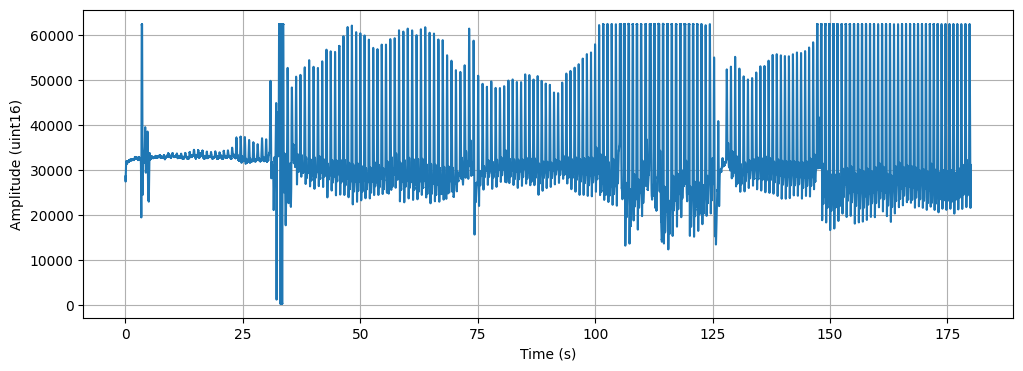

In [43]:
# Plot the whole data in a graphical figure
plt.figure(figsize = (12, 4))
plt.plot(time, data)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.show()

## Selected segment
Select a 60 seconds segment from the data and make a graph of it.

Segment starts from: 56 s


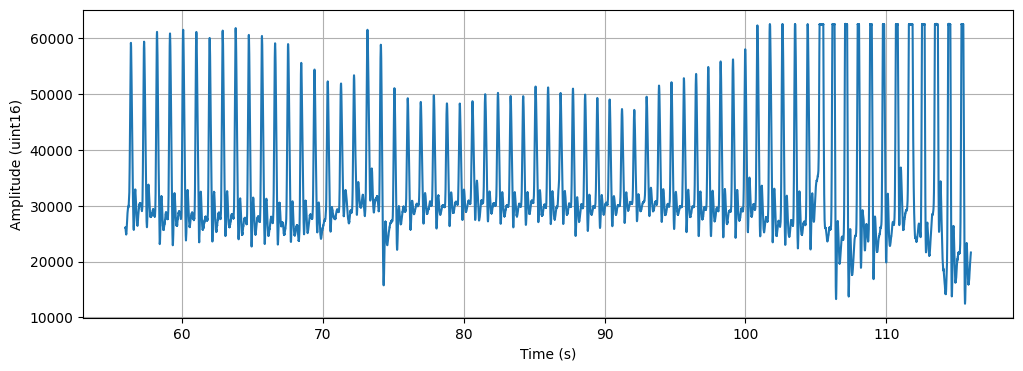

In [44]:
# Random seed based on the last four digits of the student ID number 
# My ID is 2400122, so I use the last three digits as per the teacher´s instructions.

np.random.seed(122)
t0 = np.random.randint(30, 100)
print(f'Segment starts from: {t0} s')

# Select a segment
i = (t0 < time) & (time < t0 + 60)
data2 = data[i]
time2 = time[i]

# Plot the selected segment
plt.figure(figsize = (12, 4))
plt.plot(time2, data2)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.show()


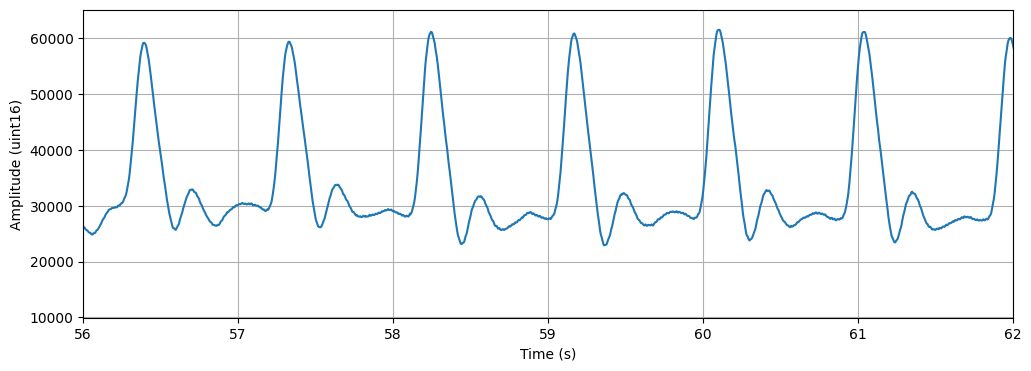

In [45]:
# Zoom in to the first 6 seconds to show the details of the signal

# Plot the selected segment
plt.figure(figsize = (12, 4))
plt.plot(time2, data2)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.xlim(t0, t0 + 6)
plt.show()

## Peak detection and HRV measurements

Detect the peaks from the selected segment of data, make a graph of the processed data segment to show the peaks, and finally display the measures computed.

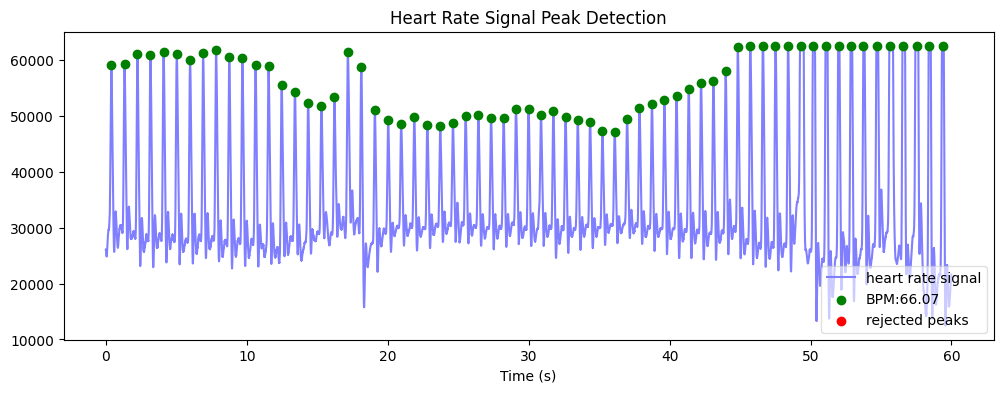

bpm: 66.07
ibi: 908.12
sdnn: 31.82
sdsd: 23.32
rmssd: 28.89
pnn20: 0.23
pnn50: 0.09
hr_mad: 28.00
sd1: 20.42
sd2: 39.24
s: 2517.29
sd1/sd2: 0.52
breathingrate: 0.23


In [46]:
working_data, measures = hp.process(data2, 250)
hp.plotter(working_data, measures)
fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.show()
for measure in measures.keys():
    print(f'{measure}: {measures[measure]:.2f}')

## Interpretation

The interpretation is done by looking at the values from peak detection and HRV measurements and those are compared to values in table Resting heart rate and variability from lecture 2 (slide 11/38). The measurements have been recorded on an adult male in age group 45-54.

1. The average heart rate in selected segment is 66 bpm, which is normal for an adult male. 

2. The average inter-beat-interval (IBI) is 908 ms. For an average male the resting value should be 923 +/- 134 ms. The measured
value is in the normal range.

3. I would use the standard deviation of intervals (SDNN) as that reflects the overall variation and not just short-term or long-term variation. The normal range for SDNN is 36,8 +/- 14,6 ms. SDNN in this segment is 31,8 ms so that falls in the normal range. 

4. Based on these levels I would like to conclude that the person studied falls in the average scale in the Resting heart rate and variability table and is thus rested and not stressed. To further verify this I also look att the RMSSD (Root mean square of successive differences) which for the person studied is 28,9 ms. That value falls in the normal range which is 23,0 +/- 10,9 ms.
 